# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Question:
- How can I add config file to git ignore?
- How can I skip the number for missing city?
- Why humidity's limit is 300%
- Do we need to save as png file for linear aggression?

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : east london
Processing Record 2 of Set 1 : georgetown
Processing Record 3 of Set 1 : busselton
Processing Record 4 of Set 1 : prince rupert
Processing Record 5 of Set 1 : ribeira grande
Processing Record 6 of Set 1 : porto novo
Processing Record 7 of Set 1 : rikitea
Processing Record 8 of Set 1 : esperance
Processing Record 9 of Set 1 : mosquera
Processing Record 10 of Set 1 : flin flon
Processing Record 11 of Set 1 : radhanpur
Processing Record 12 of Set 1 : butaritari
Processing Record 13 of Set 1 : ponta do sol
Processing Record 14 of Set 1 : fortuna
Processing Record 15 of Set 1 : kidal
City not found. Skipping...
Processing Record 16 of Set 1 : sao filipe
Processing Record 17 of Set 1 : port lincoln
Processing Record 18 of Set 1 : mar del plata
Processing Record 19 of Set 1 : saint-philippe
Processing Record 20 of Set 1 : vitim
Processing Record 21 of Set 1 : hilo
Processing Record 22 of Set 1 :

City not found. Skipping...
Processing Record 36 of Set 4 : talnakh
Processing Record 37 of Set 4 : tocopilla
Processing Record 38 of Set 4 : balkhash
Processing Record 39 of Set 4 : rincon
Processing Record 40 of Set 4 : borovoy
City not found. Skipping...
Processing Record 41 of Set 4 : riyadh
Processing Record 42 of Set 4 : pagegiai
Processing Record 43 of Set 4 : polunochnoye
City not found. Skipping...
Processing Record 44 of Set 4 : kavieng
Processing Record 45 of Set 4 : mogadishu
Processing Record 46 of Set 4 : manggar
Processing Record 47 of Set 4 : karratha
City not found. Skipping...
Processing Record 48 of Set 4 : lasa
Processing Record 49 of Set 4 : puerto ayora
City not found. Skipping...
Processing Record 50 of Set 4 : hasaki
Processing Record 0 of Set 5 : bousse
City not found. Skipping...
Processing Record 1 of Set 5 : ostrovnoy
Processing Record 2 of Set 5 : vila do conde
City not found. Skipping...
Processing Record 3 of Set 5 : otradnoye
Processing Record 4 of Set 5

Processing Record 16 of Set 8 : mokhotlong
Processing Record 17 of Set 8 : kazlu ruda
Processing Record 18 of Set 8 : mwense
Processing Record 19 of Set 8 : airai
Processing Record 20 of Set 8 : khotiv
Processing Record 21 of Set 8 : ascension
Processing Record 22 of Set 8 : jauja
Processing Record 23 of Set 8 : kiunga
Processing Record 24 of Set 8 : sakakah
Processing Record 25 of Set 8 : asyut
City not found. Skipping...
Processing Record 26 of Set 8 : mogzon
Processing Record 27 of Set 8 : bulgan
Processing Record 28 of Set 8 : qasigiannguit
Processing Record 29 of Set 8 : bassar
Processing Record 30 of Set 8 : inta
Processing Record 31 of Set 8 : rovaniemi
Processing Record 32 of Set 8 : sabang
Processing Record 33 of Set 8 : nioro
Processing Record 34 of Set 8 : tete
Processing Record 35 of Set 8 : matara
Processing Record 36 of Set 8 : maceio
Processing Record 37 of Set 8 : karangasem
Processing Record 38 of Set 8 : rio grande
Processing Record 39 of Set 8 : marfino
Processing Re

Processing Record 1 of Set 12 : bay city
Processing Record 2 of Set 12 : berbera
City not found. Skipping...
Processing Record 3 of Set 12 : izhevskoye
Processing Record 4 of Set 12 : port-gentil
Processing Record 5 of Set 12 : cockburn town
Processing Record 6 of Set 12 : imbituba
Processing Record 7 of Set 12 : sawakin
Processing Record 8 of Set 12 : najran
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})


In [60]:
# Count data
weather_dict.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [61]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,East London,90,ZA,1579453770,88,-33.02,27.91,64.40,6.93
1,George Town,20,MY,1579453844,100,5.41,100.34,80.60,3.53
2,Busselton,0,AU,1579453829,42,-33.65,115.33,66.00,13.13
3,Prince Rupert,40,CA,1579454017,80,54.32,-130.32,39.20,11.41
4,Ribeira Grande,75,PT,1579454018,82,38.52,-28.70,66.20,16.11
...,...,...,...,...,...,...,...,...,...
564,Port-Gentil,20,GA,1579454092,74,-0.72,8.78,86.00,9.17
565,Cockburn Town,0,TC,1579454092,73,21.46,-71.14,75.31,20.87
566,Imbituba,40,BR,1579454092,58,-28.24,-48.67,84.20,11.41
567,Sawakin,94,SD,1579454092,76,19.11,37.33,73.06,18.32


In [62]:
# Save city data into a csv file
weather_dict.to_csv("weather_data.csv", index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

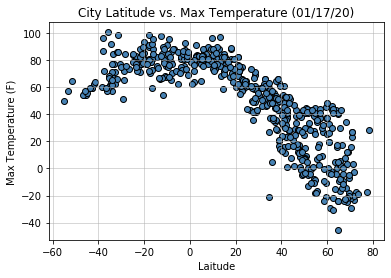

In [63]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

Max temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops.

#### Latitude vs. Humidity Plot

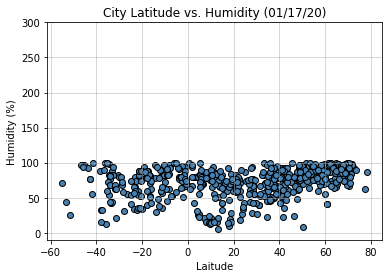

In [64]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set y axis limit
plt.ylim(-10,300)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Why can't we set ylim as 100? 

Humidity data is mostly spread around the latitude.

#### Latitude vs. Cloudiness Plot

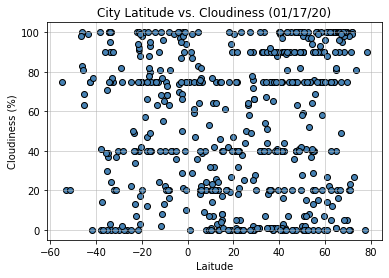

In [65]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

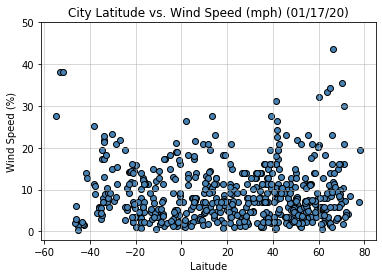

In [66]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [67]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.86


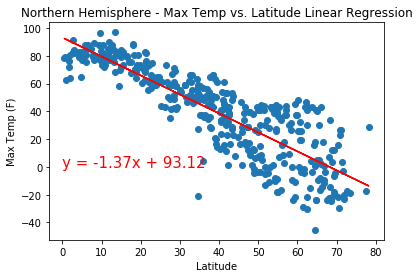

In [57]:
north_lat = northern_hemisphere["Lat"]
north_max = northern_hemisphere["Max Temp"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_max)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

There is a strong negative correlation between latitude and max temperature for northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5


Text(-30, 50, 'y = 0.42x + 84.84')

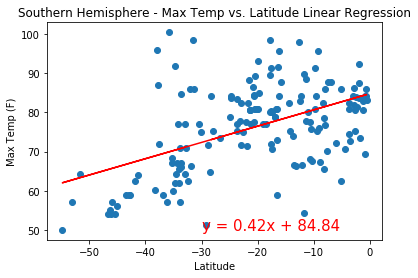

In [48]:
south_lat = southern_hemisphere["Lat"]
south_max = southern_hemisphere["Max Temp"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_max)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

There is a positive moderate correlation between latitude and max temperature for southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.44


Text(40, 15, 'y = 0.47x + 53.71')

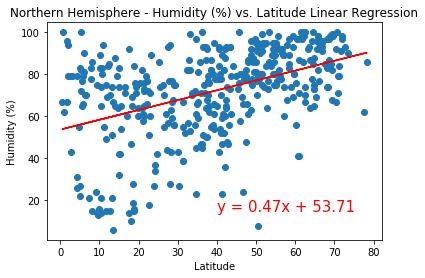

In [55]:
north_humidity = northern_hemisphere["Humidity"]
print(f"The r-squared is : {round(st.pearsonr(north_lat, north_humidity)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

There is a positive moderate correlation between latitude and windspeed for northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.1


Text(-40, 40, 'y = 0.16x + 74.6')

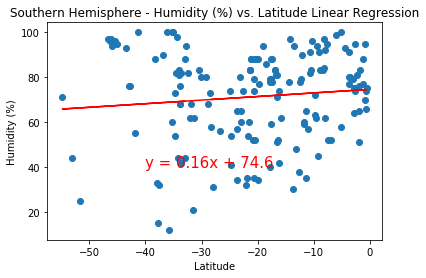

In [50]:
south_humidity = southern_hemisphere["Humidity"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_humidity)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Set a title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

There is a very weak positive correlation between latitude and humidity for southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.26


Text(40, 15, 'y = 0.49x + 32.83')

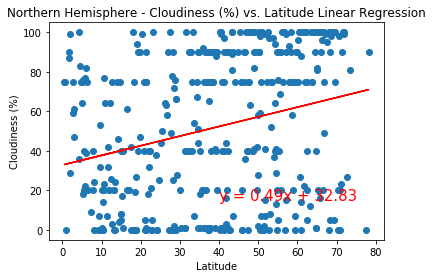

In [51]:
north_cloudiness = northern_hemisphere["Cloudiness"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_cloudiness)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

There is a weak positive correlation between latitude and cloudiness for northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.1


Text(-30, 30, 'y = 0.24x + 63.56')

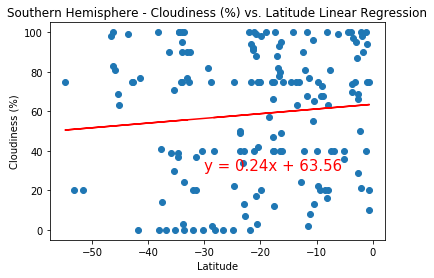

In [52]:
south_cloudiness = southern_hemisphere["Cloudiness"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_cloudiness)[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

There is a very weak positive correlation between latitude and cloudiness for southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09


Text(50, 25, 'y = 0.03x + 7.82')

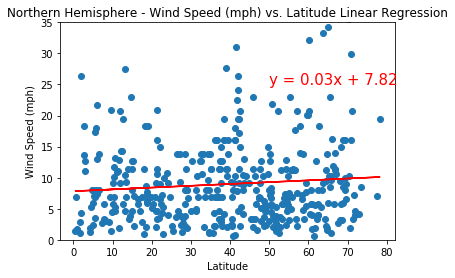

In [53]:
north_wind = northern_hemisphere["Wind Speed"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_wind)[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

plt.ylim(0, 35)

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(50,25),fontsize=15,color="red")

There is a very weak positive correlation between latitude and windspeed for northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.23


Text(-30, 25, 'y = -0.12x + 6.43')

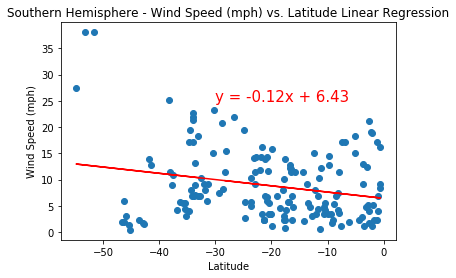

In [54]:
south_wind = southern_hemisphere["Wind Speed"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_wind)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

There is a very weak negative correlation between latitude and wind speed for southern hemisphere. 